In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 23.7MB/s]
100% 163M/163M [00:08<00:00, 20.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import os
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask = os.listdir('/content/data/with_mask')
print(with_mask[1:6])
print(with_mask[-5:])

['with_mask_633.jpg', 'with_mask_3557.jpg', 'with_mask_1306.jpg', 'with_mask_348.jpg', 'with_mask_1556.jpg']
['with_mask_3337.jpg', 'with_mask_2069.jpg', 'with_mask_2873.jpg', 'with_mask_59.jpg', 'with_mask_871.jpg']


In [7]:
without_mask = os.listdir('/content/data/without_mask')
print(without_mask[1:6])
print(without_mask[-5:])

['without_mask_1060.jpg', 'without_mask_2242.jpg', 'without_mask_404.jpg', 'without_mask_1480.jpg', 'without_mask_2695.jpg']
['without_mask_1980.jpg', 'without_mask_3579.jpg', 'without_mask_3285.jpg', 'without_mask_3069.jpg', 'without_mask_35.jpg']


In [8]:
print("Number of with mask image",len(with_mask))
print("Number of without mask image",len(without_mask))

Number of with mask image 3725
Number of without mask image 3828


In [9]:
# Create labels
# with mask  1
# without mask 0
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
['Ai']*4

['Ai', 'Ai', 'Ai', 'Ai']

In [11]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


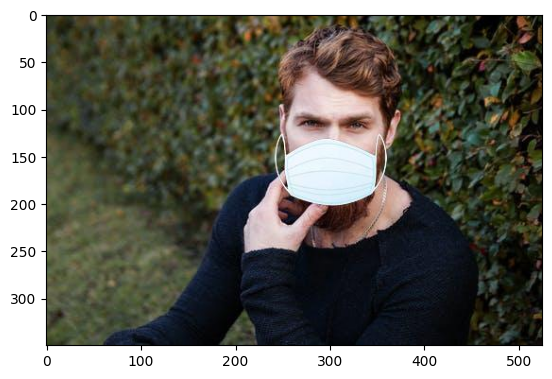

In [13]:
# Displaying the image
img = mping.imread('/content/data/with_mask/with_mask_1.jpg')
plt.imshow(img)

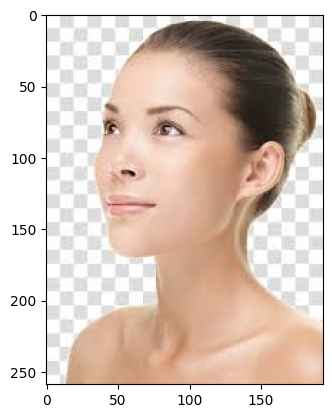

In [14]:
# displaying image without mask
img = mping.imread('/content/data/without_mask/without_mask_2925.jpg')
plt.imshow(img)
plt.show()

In [15]:
# Image Processing

In [16]:
# Convert the images into numpy array
# resize
with_mask_path = '/content/data/with_mask/'

data  = []

for image_filename in with_mask:
  image = Image.open(with_mask_path + image_filename)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for image_filename in without_mask:
  image = Image.open(without_mask_path + image_filename)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 98,  97, 111],
        [ 97,  96, 110],
        [ 95,  95, 107],
        ...,
        [144, 135, 143],
        [131, 127, 138],
        [122, 120, 134]],

       [[ 94,  93, 107],
        [101,  99, 113],
        [ 99,  98, 110],
        ...,
        [142, 133, 142],
        [129, 124, 135],
        [119, 117, 131]],

       [[101,  98, 112],
        [102,  99, 113],
        [ 99,  97, 110],
        ...,
        [138, 130, 138],
        [125, 120, 132],
        [115, 113, 127]],

       ...,

       [[ 28,  30,  42],
        [ 28,  30,  42],
        [ 28,  30,  42],
        ...,
        [ 86, 109, 173],
        [ 45,  67, 117],
        [ 28,  47,  76]],

       [[ 28,  30,  42],
        [ 28,  30,  42],
        [ 28,  30,  42],
        ...,
        [ 86, 109, 173],
        [ 38,  60, 110],
        [ 24,  43,  73]],

       [[ 28,  30,  42],
        [ 28,  30,  42],
        [ 28,  30,  42],
        ...,
        [105, 128, 192],
        [ 33,  55, 104],
        [ 21,  40,  70]]], dtype=uint8)
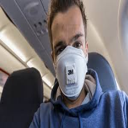

In [19]:
data[0]

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
type(data[0])

numpy.ndarray

In [22]:
# Converting the image list and label list to numpy array
X = np.array(data)
y = np.array(labels)

In [23]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [24]:
X.shape, y.shape

((7553, 128, 128, 3), (7553,))

In [25]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6042, 128, 128, 3), (6042,), (1511, 128, 128, 3), (1511,))

In [27]:
X_train_scale = X_train/255.
X_test_scale = X_test/255.

In [28]:
X_train_scale[0]

array([[[0.12156863, 0.27843137, 0.04313725],
        [0.15294118, 0.30980392, 0.0745098 ],
        [0.09803922, 0.25490196, 0.02745098],
        ...,
        [0.05882353, 0.24705882, 0.01176471],
        [0.14901961, 0.32941176, 0.08627451],
        [0.18431373, 0.35686275, 0.10980392]],

       [[0.10980392, 0.27058824, 0.03529412],
        [0.10588235, 0.2627451 , 0.02745098],
        [0.10980392, 0.27058824, 0.03921569],
        ...,
        [0.08235294, 0.26666667, 0.03529412],
        [0.18823529, 0.36862745, 0.1254902 ],
        [0.25490196, 0.42745098, 0.18039216]],

       [[0.18039216, 0.34117647, 0.10980392],
        [0.19215686, 0.35686275, 0.12156863],
        [0.25098039, 0.41568627, 0.18039216],
        ...,
        [0.1372549 , 0.31372549, 0.08235294],
        [0.2745098 , 0.44705882, 0.20784314],
        [0.32941176, 0.50196078, 0.25490196]],

       ...,

       [[0.42745098, 0.43137255, 0.41176471],
        [0.44705882, 0.44705882, 0.43137255],
        [0.41176471, 0

array([[[ 31,  71,  11],
        [ 39,  79,  19],
        [ 25,  65,   7],
        ...,
        [ 15,  63,   3],
        [ 38,  84,  22],
        [ 47,  91,  28]],

       [[ 28,  69,   9],
        [ 27,  67,   7],
        [ 28,  69,  10],
        ...,
        [ 21,  68,   9],
        [ 48,  94,  32],
        [ 65, 109,  46]],

       [[ 46,  87,  28],
        [ 49,  91,  31],
        [ 64, 106,  46],
        ...,
        [ 35,  80,  21],
        [ 70, 114,  53],
        [ 84, 128,  65]],

       ...,

       [[109, 110, 105],
        [114, 114, 110],
        [105, 106, 102],
        ...,
        [ 53,  59,  69],
        [ 45,  51,  56],
        [ 46,  51,  55]],

       [[104, 105,  99],
        [109, 110, 105],
        [109, 110, 104],
        ...,
        [ 49,  52,  57],
        [ 48,  52,  53],
        [ 50,  52,  53]],

       [[103, 104,  97],
        [115, 116, 110],
        [112, 113, 107],
        ...,
        [ 41,  45,  48],
        [ 44,  48,  49],
        [ 47,  49,  50]]], dtype=uint8)
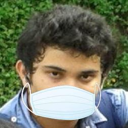

In [29]:
X_train[0]

In [30]:
# Building a Convolutional Neural Network
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Input

In [31]:
model = Sequential()
model.add(Input(shape=(128,128,3)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(2,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,708,386 (14.15 MB)

 Trainable params: 3,708,194 (14.15 MB)

 Non-trainable params: 192 (768.00 B)

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
# training the neural network
history = model.fit(X_train_scale, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.7862 - loss: 1.9612 - val_accuracy: 0.5140 - val_loss: 1.7259
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8590 - loss: 0.6695 - val_accuracy: 0.5537 - val_loss: 1.4909
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8910 - loss: 0.3584 - val_accuracy: 0.7570 - val_loss: 0.6714
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9179 - loss: 0.2175 - val_accuracy: 0.9190 - val_loss: 0.2671
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9368 - loss: 0.1602 - val_accuracy: 0.9256 - val_loss: 0.2822


In [35]:
loss, accuracy = model.evaluate(X_test_scale, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9146 - loss: 0.3343
Test Accuracy = 0.9099934101104736


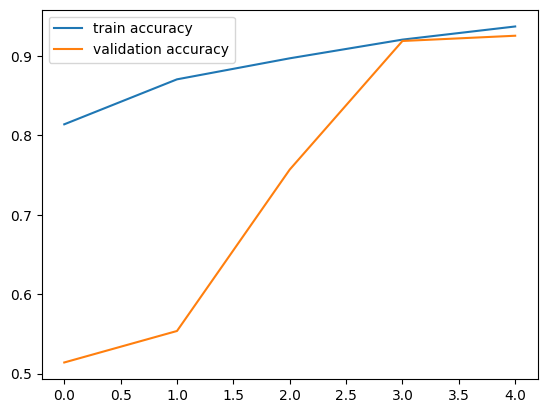

In [37]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

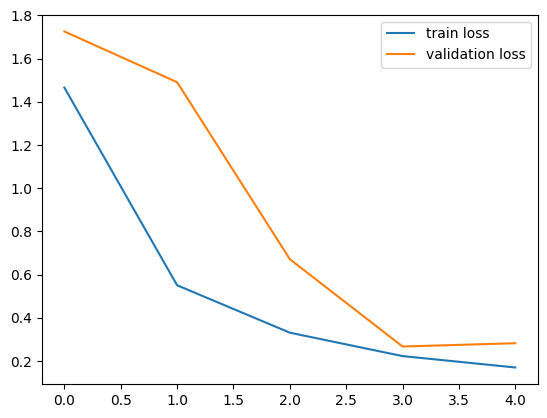

In [38]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

## **Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.9163822e-06 2.5249349e-06]]
1
The person in the image is wearing a mask


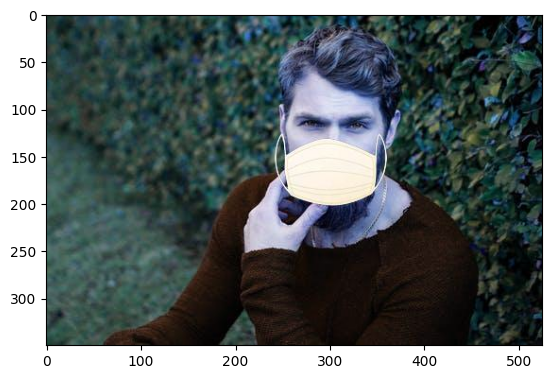

In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.00080074 0.00074601]]
0
The person in the image is not wearing a mask


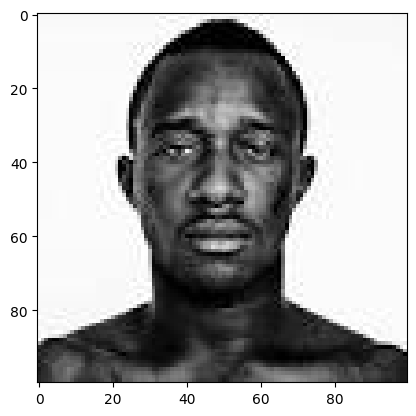

In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')